In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
regression1 = pd.read_csv('regression_1.csv')
regression2 = pd.read_csv('regression_2.csv')
classification = pd.read_csv('classification.csv')

In [3]:
regression1

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342
...,...,...
58,5.8,-0.930421
59,5.9,-1.674052
60,6.0,-0.473458
61,6.1,-1.529905


In [4]:
regression2

,x1,x2
0,-10.0,0.070295
1,-9.0,-0.045762
2,-8.0,0.044281
3,-7.0,-0.012570
4,-6.0,0.208319
5,-5.0,-0.070227
6,-4.0,0.044290
7,-3.0,-0.005975
8,-2.0,-0.081131
9,-1.0,0.109323


In [5]:
classification

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
...,...,...,...
495,-10.392365,-3.890568,1
496,-9.143800,-4.747003,1
497,-10.010185,-4.373446,1
498,-2.262481,4.878788,0


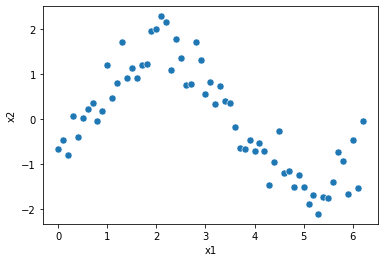

6.2


In [6]:
X = np.asarray(regression1['x1'])
y = regression1['x2']
sns.scatterplot(data=regression1, x='x1', y='x2', s=50)
plt.show()
print(np.max(regression1["x1"]))

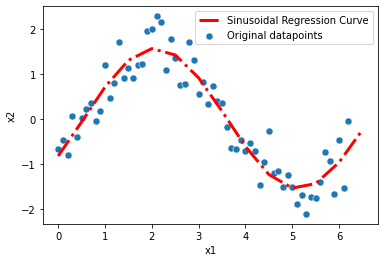

In [7]:
from scipy.optimize import curve_fit
def sine_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

values = curve_fit(sine_function,
                   regression1["x1"], regression1["x2"])[0]
x = np.arange(0, 7, 0.5)
y_fit = sine_function(x, *values)

plt.plot(x, y_fit, '-.', color='red',
         linewidth=3,
         label = "Sinusoidal Regression Curve")
sns.scatterplot(data=regression1, x='x1', y='x2', s=50,
                label = "Original datapoints")
plt.savefig('re1.jpg')

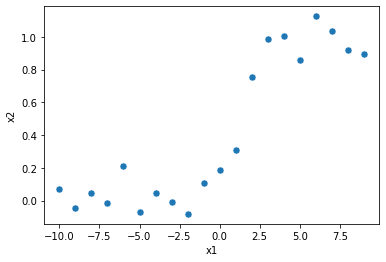

In [8]:
sns.scatterplot(data=regression2, x='x1', y='x2', s=50)

plt.show()

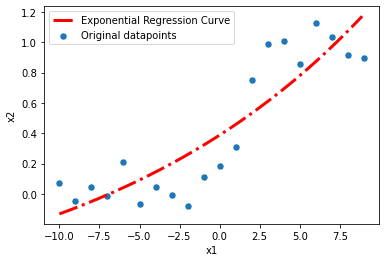

In [9]:
from scipy.optimize import curve_fit
def exponential_function(x, a, b, c):
    return a * (b**x) + c
values = curve_fit(exponential_function,
                   regression2['x1'], regression2['x2'])[0]

x = np.arange(-10,9,0.1)
y_fit = exponential_function(x, *values)

plt.plot(x, y_fit, '-.', color='red',
         linewidth=3,
         label = 'Exponential Regression Curve')
sns.scatterplot(data=regression2, x='x1', y='x2', s=50,
                label = "Original datapoints")
plt.savefig('re2.jpg')

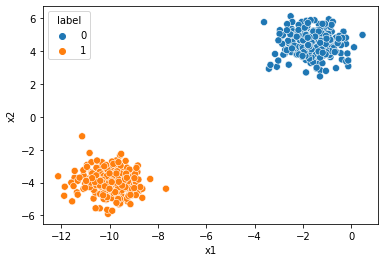

In [10]:
sns.scatterplot(data=classification, x='x1', y='x2', hue= 'label', s=50)
plt.show()

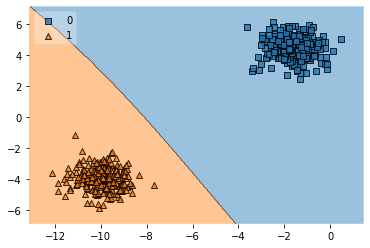

In [11]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
X = np.c_[classification['x1'],
          classification['x2']]
y = classification.label
svm = SVC(kernel='poly', degree=3)
svm.fit(X, y)

plot_decision_regions(X, np.asarray(y, dtype='int'),
                      clf=svm, legend=2)
plt.savefig('classification.jpg')